# Open Data
Brian Li \
9/17/2023

The mapped area below represents the neighborhoods in San Francisco, California.

The data was taken from https://data.sfgov.org.

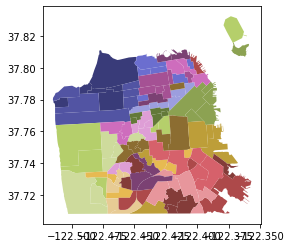

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   link      93 non-null     object  
 1   name      117 non-null    object  
 2   geometry  117 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 2.9+ KB


In [11]:
import geopandas as gpd
import pandas as pd
import geojson
import matplotlib.pyplot as plt

neighborhoods = gpd.read_file("https://data.sfgov.org/api/geospatial/pty2-tcw4?method=export&format=GeoJSON")
neighborhoods.plot(cmap="tab20b")
plt.show()

neighborhoods.info()

"The World Bank is a group of international agencies that provide funding and knowledge to promote economic development in developing countries" (https://michaelminn.net/tutorials/python-open-data/).

The indicator being mapped below is high-technology exports as a percentage of total manufactured exports for the year 2021.

North America and Eastern Asia are hubs of high tech manufacturing and Africa lacks much in the way of high tech infrastructure, as expected.

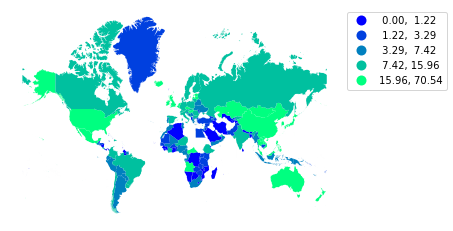

In [22]:
wb_ht = pd.read_excel("https://api.worldbank.org/v2/en/indicator/TX.VAL.TECH.MF.ZS?downloadformat=excel", skiprows=3)
world = gpd.read_file("https://michaelminn.net/tutorials/data/2023-natural-earth-countries.geojson")
world = world.to_crs("EPSG:3857")
wb_ht = wb_ht.fillna(method="ffill", axis=1)
wb_ht["2021"] = pd.to_numeric(wb_ht["2021"], errors="coerce")
wb_world = world.merge(wb_ht, left_on="ISO_A3", right_on="Country Code")

sub = wb_world.plot("2021", scheme="quantiles", cmap="winter", legend=True, legend_kwds=dict(loc='upper left', bbox_to_anchor=(1, 1)))
sub.set_axis_off()
plt.show()

In [26]:
pip install census

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


"The US Census Bureau (USCB) is the part of the US federal government responsible for collecting data about people and the economy in the United States" (https://michaelminn.net/tutorials/python-open-data/).

The data being mapped are the the median gross rents in dollars per state across the continental US in 2022.

The east and west coasts are the most expensive places to live in the US, while the relatively more rural midwest is cheaper.

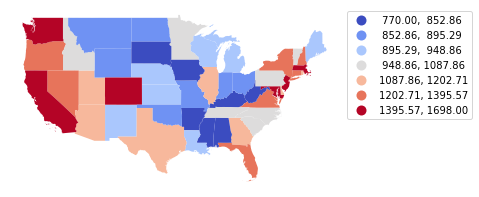

In [35]:
import census

# there's a key here, but removed for HW Submission
c_api = census.Census("")
rent = c_api.acs5.state(('NAME', 'GEO_ID', 'B25064_001E'), "*")
rent_df = pd.DataFrame(rent)
rent_df = rent_df.rename(columns={"B25064_001E":"Median Gross Rent"})

states = gpd.read_file("https://www2.census.gov/geo/tiger/GENZ2022/shp/cb_2022_us_state_5m.zip")
states = states.to_crs("EPSG:3857")
states = states[~states["STUSPS"].isin(['AK', 'HI', 'PR'])]
rent_states = states.merge(rent_df, left_on="AFFGEOID", right_on="GEO_ID")

subplot = rent_states.plot("Median Gross Rent", scheme="quantiles", k=7, cmap="coolwarm", legend=True, legend_kwds=dict(loc='upper left', bbox_to_anchor=(1, 1)))
subplot.set_axis_off()

plt.show()

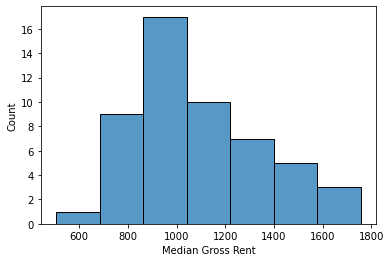

In [32]:
import seaborn as sns
ax = sns.histplot(rent_df["Median Gross Rent"])
plt.show()